In [1]:
from SequentialPOVMMeasurement import SequentialPOVMMeasurement
import qiskit
from qiskit import *
from utilities import simple_povm_xyz, povm_tetrahedron, scale_noise
from ProbabilisticMeasurement import ProbabilisticMeasurement
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import numpy as np
from utilities import scale_noise, vd, vd_int, povm_bell
from scipy.stats import wasserstein_distance
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import matplotlib.pyplot as plt
from POVM import POVM

In [2]:
IBMQ.load_account()
# Device to be simulated
dev = IBMQ.get_provider().get_backend("ibmq_manila")

# Extracted simulator for the device
sim = AerSimulator.from_backend(dev)

# noise model of the simulator
noise_model = NoiseModel().from_backend(dev)

In [3]:
omega = 0.5

lamb = (np.cos(omega)**2)/2

phi1 = np.cos(omega)*np.array([1, 0]) + np.sin(omega)*np.array([0, 1])

phi2 = np.cos(omega)*np.array([1, 0]) - np.sin(omega)*np.array([0, 1])

phi1T = np.sin(omega)*np.array([1, 0]) - np.cos(omega)*np.array([0, 1])

phi2T = np.sin(omega)*np.array([1, 0]) + np.cos(omega)*np.array([0, 1])

A1 = (1/2)*np.array([[np.tan(omega)**2, np.tan(omega)], [np.tan(omega), 1]])

A2 = (1/2)*np.array([[np.tan(omega)**2, -np.tan(omega)], [-np.tan(omega), 1]])

A_u = np.array([[1 - np.tan(omega)**2, 0], [0, 0]])

POVM([A1, A2, A_u]).validation()

True

In [15]:
seq = SequentialPOVMMeasurement([A1, A2, A_u], ["A1", "A2", "A?"])
# Prepare measured state
prepared_state = QuantumCircuit(1, 1)
initial_state = phi2/np.linalg.norm(phi2)
prepared_state.initialize(initial_state, 0)
circ = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
circ[0].q_circuit.draw("mpl")

KeyboardInterrupt: 

In [13]:
circ = seq.make_single_circuit([["A1", "A2"], ["A?"]], prepared_state)
circ.draw("mpl")

KeyboardInterrupt: 

In [44]:
# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement([A1, A2, A_u], ["A1", "A2", "A?"])
prob = ProbabilisticMeasurement([A1, A2, A_u], ["A1", "A2", "A?"])


# Prepare measured state
prepared_state = QuantumCircuit(1, 1)
initial_state = phi2/np.linalg.norm(phi2)
prepared_state.initialize(initial_state, 0)

# 1000 shots noise scaling
scales = np.linspace(0, 1, 15)

resultss = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    # resultss.append(seq.measure([["A1", "A2"], ["A?"]], prepared_state, backend=sim_noise))
    circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
    circuit1 = circuits[0]
    job_0 = qiskit.execute(circuit1.q_circuit, backend=sim_noise, shots=1000)
    a1_res = job_0.result().get_counts().get("11", 0.)
    a2_res = job_0.result().get_counts().get("01", 0.)
    au_res = job_0.result().get_counts().get("10", 0.) + job_0.result().get_counts().get("00", 0.)
    resultss.append([a1_res, a2_res, au_res])


resultsp = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp.append(prob.measure(prepared_state, backend=sim_noise))


In [45]:
# 1000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 5000

resultss1 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    # resultss.append(seq.measure([["A1", "A2"], ["A?"]], prepared_state, backend=sim_noise))
    circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
    circuit1 = circuits[0]
    job_0 = qiskit.execute(circuit1.q_circuit, backend=sim_noise, shots=shots)
    a1_res = job_0.result().get_counts().get("11", 0.)
    a2_res = job_0.result().get_counts().get("01", 0.)
    au_res = job_0.result().get_counts().get("10", 0.) + job_0.result().get_counts().get("00", 0.)
    resultss1.append([a1_res, a2_res, au_res])


resultsp1 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp1.append(prob.measure(prepared_state, backend=sim_noise, shots=shots))

In [46]:
# 1000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 10000

resultss2 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    # resultss.append(seq.measure([["A1", "A2"], ["A?"]], prepared_state, backend=sim_noise))
    circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
    circuit1 = circuits[0]
    job_0 = qiskit.execute(circuit1.q_circuit, backend=sim_noise, shots=shots)
    a1_res = job_0.result().get_counts().get("11", 0.)
    a2_res = job_0.result().get_counts().get("01", 0.)
    au_res = job_0.result().get_counts().get("10", 0.) + job_0.result().get_counts().get("00", 0.)
    resultss2.append([a1_res, a2_res, au_res])


resultsp2 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp2.append(prob.measure(prepared_state, backend=sim_noise, shots=shots))

In [47]:
# 1000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 15000

resultss3 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    # resultss.append(seq.measure([["A1", "A2"], ["A?"]], prepared_state, backend=sim_noise))
    circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
    circuit1 = circuits[0]
    job_0 = qiskit.execute(circuit1.q_circuit, backend=sim_noise, shots=shots)
    a1_res = job_0.result().get_counts().get("11", 0.)
    a2_res = job_0.result().get_counts().get("01", 0.)
    au_res = job_0.result().get_counts().get("10", 0.) + job_0.result().get_counts().get("00", 0.)
    resultss3.append([a1_res, a2_res, au_res])


resultsp3 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp3.append(prob.measure(prepared_state, backend=sim_noise, shots=shots))

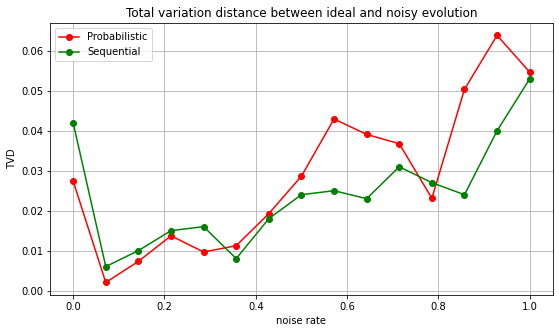

In [71]:
ideal_results = [0, 450, 550]

prob_vd = [vd_int(result, ideal_results) for result in resultsp]
seq_vd = [vd_int(result, ideal_results) for result in resultss]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

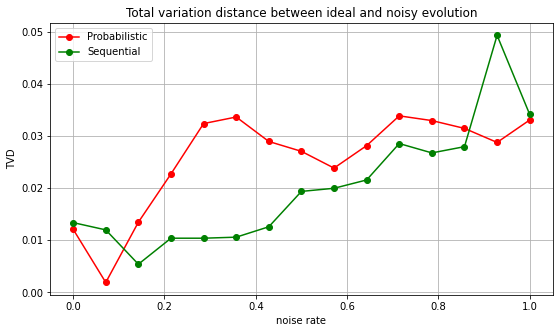

In [72]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp1]
seq_vd = [vd_int(result, ideal_results) for result in resultss1]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

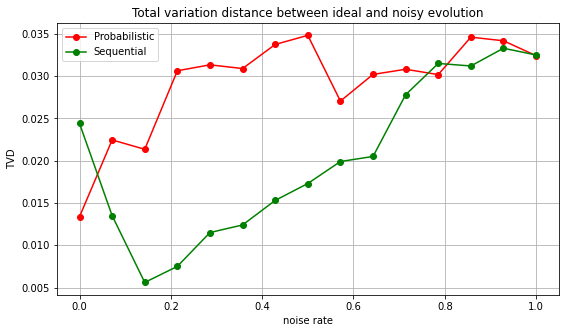

In [73]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp2]
seq_vd = [vd_int(result, ideal_results) for result in resultss2]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

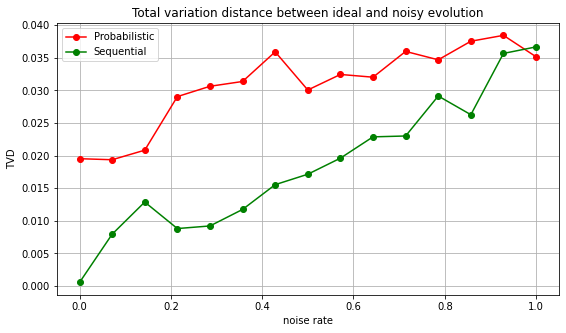

In [74]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp3]
seq_vd = [vd_int(result, ideal_results) for result in resultss3]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

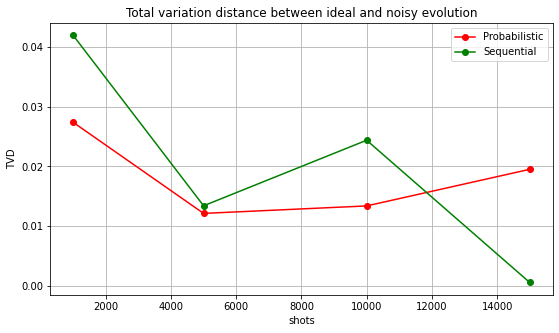

15


In [75]:
prob_vd = [vd_int(resultsp[0], ideal_results), vd_int(resultsp1[0], ideal_results), vd_int(resultsp2[0], ideal_results), vd_int(resultsp3[0], ideal_results)]
seq_vd = [vd_int(resultss[0], ideal_results), vd_int(resultss1[0], ideal_results), vd_int(resultss2[0], ideal_results), vd_int(resultss3[0], ideal_results)]

shots = [1000, 5000, 10000, 15000]


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("shots")

ax.plot(shots, prob_vd, "-or", label="Probabilistic")
ax.plot(shots, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

print(len(resultsp))

In [69]:
# 1000 shots noise scaling
shots = [1000*i for i in range(1, 6, 5)]

resultss4 = []
for shot in shots:
    circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
    circuit1 = circuits[0]
    job_0 = qiskit.execute(circuit1.q_circuit, backend=dev, shots=shot)
    a1_res = job_0.result().get_counts().get("11", 0.)
    a2_res = job_0.result().get_counts().get("01", 0.)
    au_res = job_0.result().get_counts().get("10", 0.) + job_0.result().get_counts().get("00", 0.)
    resultss4.append([a1_res, a2_res, au_res])


resultsp4 = []
for shot in shots:
    resultsp4.append(prob.measure(prepared_state, backend=dev, shots=shot))
print(shots)

KeyboardInterrupt: 

In [ ]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp4]
seq_vd = [vd_int(result, ideal_results) for result in resultss4]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("shots")

ax.plot(shots, prob_vd, "-or", label="Probabilistic")
ax.plot(shots, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()